# Regression 101: 
## Data Mining 2021 

Mauricio Araya

Acknowledgments to Francisco Förster Burón (CMM-U.Chile / MAS) 

## 1 - Back to school!

Let us consider 2 data points:

$(x_1,y_1) = (9,5)$

$(x_2,y_2) = (4,2)$

And the linear function $f(x) = ax + b = y$

We know from the school that

$a = \frac{(y_1 - y_2)}{(x_1 - x_2)}$

$b = y_1 - a x_1$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style> container { width:100% !important; }</style>"))

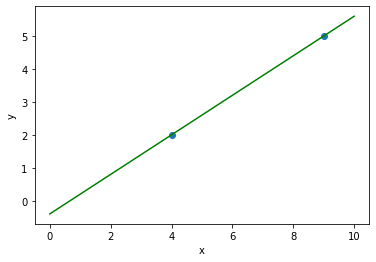

(0.6, -0.39999999999999947)

In [2]:
(x1,y1) = (9,5)
(x2,y2) = (4,2)
 
v=np.linspace(0,10,100)

a = (y1 - y2)/(x1 - x2)
b = y1 - a*x1

yv = a*v+ b 

plt.plot(v,yv,c='g')
plt.scatter([x1,x2],[y1,y2])
plt.xlabel("x")
plt.ylabel("y")
plt.show()
a,b

### 1.1 - Add one more point

What happend if we have one more point?

$(x_3,y_3) = (7,2)$

We have an overdetermined (and probably inconsistent) **linear** system:

$ax_1 + b = y_1$

$ax_2 + b = y_2$

$ax_3 + b = y_3$

$\implies$ no solution

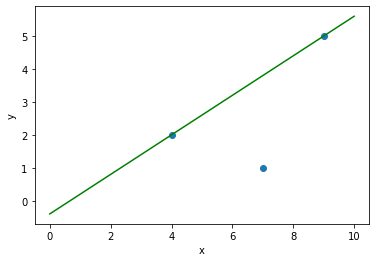

In [3]:
(x3,y3) = (7,1)
plt.plot(v,yv,c='g')
plt.scatter([x1,x2,x3],[y1,y2,y3])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.2 - Embrace the errors (and your first year)

Two ideas:
* Option 1: we need non-linear system solving (hard life)
* Option 2: an **error** is the reason of the deviation of our simple model (regression)

Let us asume now that 

$f(x_1) + \epsilon_1 = y_1$

$f(x_2) + \epsilon_2 = y_2$

$f(x_3) + \epsilon_3 = y_3$

Then, one could define:

$J_1 = \sum_i \epsilon_i = \sum_i | y_i - f(x_i) |$

$J_1(a,b) = \sum_i |y_i - a x_i - b|$

$J_2 = \sum_i \epsilon_i = \sum_i ( y_i - f(x_i) )^2$

$J_2(a,b) = \sum_i (y_i - a x_i - b)^2$

$\frac{\partial J_2}{\partial a}  =  0 $

$\frac{\partial J_2}{\partial b}  =  0 $


In [4]:
def print_reg(a=0.6,b=0.0):
    yv = a*v+ b 
    xx = np.array([x1,x2,x3])
    yy = np.array([y1,y2,y3])
    plt.plot(v,yv,c='g',label="model")
    plt.vlines(x=x1, ymin=min(y1,a*x1+b), ymax=max(y1,a*x1+b), color='r', label='$\epsilon_1$')
    plt.vlines(x=x2, ymin=min(y2,a*x2+b), ymax=max(y2,a*x2+b), color='r', label='$\epsilon_2$')
    plt.vlines(x=x3, ymin=min(y3,a*x3+b), ymax=max(y3,a*x3+b), color='r', label='$\epsilon_3$')
    diff = yy - a*xx + b
    j1 = np.abs(diff).sum()
    j2 = (diff*diff).sum()
    plt.scatter(xx,yy,label="points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.annotate("j1 = "+str(j1), xytext=(4, 9),xy = (4,9))
    plt.annotate("j2 = "+str(j2), xytext=(4, 8),xy = (4,8))
    plt.ylim(0,10)
    plt.legend();
    plt.show()
    

In [5]:
from ipywidgets import interact 

interact(print_reg,a=(0.,2.,0.1),b=(-1.,1.,0.1))

interactive(children=(FloatSlider(value=0.6, description='a', max=2.0), FloatSlider(value=0.0, description='b'…

<function __main__.print_reg(a=0.6, b=0.0)>

In regression you want to behave well when you actually use the model, not for the data that you have. We usually call **training data** to the data that you have. You can always keep some **test data** from the regressor to assess your regressor.

### 1.3 - Why is called linear regression?

One can linearly regress:
* $ f(x;a,b) = a x + b $
* $ f(x;a,b) = a x^2 + bx$
* $ f(x;a,b) = a \log(x) + b x!$

Linear regression is not linear with respect to $x$ (data): the searched **parameters need to be linear**.

Non-Linear regression:
* $ f(x;a,b) = a^2 x + b $
* $ f(x;a,b) = e^{- a x - b} $ 
* $ f(x;a,b) = \begin{cases} x & \textrm{ if } a > b \\ 0 & \textrm{ else } \end{cases}$

Stop thinking in straight line (at least in your data space)


## 2 - The Principle of Generalization
### (or why a simple regression is called Machine Learning)


### 2.1 - Some Definitions

### Over/Under Fitting 

Two important ideas in machine learning are **overfitting** and **underfitting**.

If a model represents our data too accurately, it may not generalize well to unobserved data.

### Bias

It quantifies the precision of the model accross the training sets.

### Variance 

It quantifies how sensitive the model is to small changes in the training set.

![](images/biasvariance.png)

### Complexity, accuracy, robustness

In general, we want precise and robust models. 

**Simpler models tend to be less accurate, but more robust.**

**More complex models tend to be more accurate, but less robust.**

This tension is usually expressed as the **bias-variance trade-off** which is central to machine learning

### Model selection

No model performs uniformly better than the others. One model may perform better in one data set and badly on another.

### Regularization

A popular solution to reduce overfitting  consists of adding structure to the model through **regularization**. This favors simpler models through training inspired by **Occam's razor**.

### 2.2 -Let us use some real data...


![title](images/iris.png)

![title](images/irises.png)



In [6]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
dfIris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
import numpy as np
X=dfIris[['petal_length']]
y=dfIris[['petal_width']]
xvals=np.linspace(X.min(),X.max(),200)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


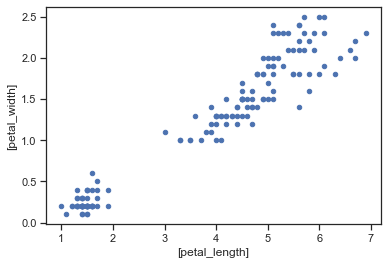

In [8]:
dfIris.plot.scatter(['petal_length'],['petal_width'])

import numpy as np
X=dfIris[['petal_length']]
y=dfIris[['petal_width']]
xvals=np.linspace(X.min(),X.max(),200)

### 2.3 - Polinomial Model 
#### Remember Linear Algebra... it is back to haunt you!!!

We can define a *+polinomial model**:
* $ \mathbf{g} = g(x) = [1, x, x^2, x^3,\ldots,x^k], g: \mathbb{R} \mapsto \mathbb{R}^{k+1}  $
* $ \mathbf{w}^T \mathbf{g} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 \ldots + w_k x^k $


We can have several degrees then...
* d=1) $ \mathbf{w}^T \mathbf{g} = w_0 + w_1\cdot x $
* d=2) $ \mathbf{w}^T \mathbf{g} = w_0 + w_1\cdot x + w_2\cdot x^2 $
* d=3) $ \mathbf{w}^T \mathbf{g} = w_0 + w_1\cdot x + w_2\cdot x^2 + w_3\cdot x^3$

In [9]:
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

def train_and_plot(d=15,a=0.00):
    gen_poly_terms = PolynomialFeatures(degree=d)
    X_train_with_poly = gen_poly_terms.fit_transform(X)
    #poly_regression = Lasso(alpha=a)
    #poly_regression = Ridge(alpha=a)
    poly_regression = LinearRegression()
    poly_regression.fit(X_train_with_poly, y)
    poly_vals=gen_poly_terms.transform(xvals)
    y_pred=poly_regression.predict(poly_vals)
    fig, ax = plt.subplots()
    dfIris.plot.scatter('petal_length','petal_width',color='gray',alpha=0.1,label='data',ax=ax)
    ax.plot(xvals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.figure()
    plt.bar(range(len(poly_regression.coef_[0])),poly_regression.coef_[0])
    #plt.bar(range(len(poly_regression.coef_)),poly_regression.coef_)

In [10]:
from ipywidgets import interact
interact(train_and_plot,d=(2,30),a=(0.0,100.0))

interactive(children=(IntSlider(value=15, description='d', max=30, min=2), FloatSlider(value=0.0, description=…

<function __main__.train_and_plot(d=15, a=0.0)>

## 3 - Generalized Regression 
### Lets go hiperdimensional....

What is a linear model?
$$ y = f(\mathbf{x};\mathbf{w}) = \sum_j w_j \phi_j(\mathbf{x}) + \epsilon = \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}) + \epsilon $$

Examples:
* Polinomial: $\phi_j(\mathbf{x}) = \|\mathbf{x}\|^j$
* Gaussian: $\phi_j(\mathbf{x}) = \exp\left\{\frac{- \|\mathbf{x} - \boldsymbol{\mu}_j\|^2}{2s^2}\right\}$
* Sigmoidal: $\phi_j(\mathbf{x}) = \sigma\left(\frac{\|\mathbf{x} - \boldsymbol{\mu}_j\|}{s}\right)= \frac{1}{1 + \exp\left( \frac{-\|\mathbf{x} - \boldsymbol{\mu}_j\|}{s}\right)}$

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def show_gaussian(mu=0.0,s=1.0):
    a = np.arange(-10, 10, 0.1)
    plt.plot(a, np.exp(-(a-mu)**2/(2*s**2)))
interact(show_gaussian,mu=(-2.0,2.0),s=(0.1,10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.show_gaussian(mu=0.0, s=1.0)>

In [12]:
def show_sigmoid(mu=0.0,s=1.0):
    a = np.arange(-10, 10, 0.1)
    plt.plot(a, 1./(1. + np.exp(-(a-mu)/s)))
interact(show_sigmoid,mu=(-2.0,2.0),s=(0.1,10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.show_sigmoid(mu=0.0, s=1.0)>

### 3.1 - Errors and Probabilities (Third year?)

Imagine you fix every $\mu_j$ and $s$. 

<b>How we can learn</b> $\mathbf{w}$ assuming Gaussian noise $\epsilon \sim N(\mu,\sigma)$?

$$\begin{align} Pr(Y \mid \mathbf{X},\mathbf{y}) &= \prod_i \mathcal{N}(Y = y_i \mid f(\mathbf{x}_i;\mathbf{w}),\sigma)\\ &= \prod_i \mathcal{N}(Y = y_i \mid \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i),\sigma)\end{align} $$

We want to maximize this probability

$$ \begin{align} \ln Pr(Y \mid \mathbf{X},\mathbf{y}) & = \sum_i \ln \mathcal{N}(Y = y_i \mid \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i),\sigma)\\ & \propto \sum_i\left( y_i - \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i)\right)^2 \end{align} $$

If we compute the gradient of this
$$ \begin{align} \nabla\ln Pr(Y \mid \mathbf{X},\mathbf{y}) & = \sum_i\left( y_i - \mathbf{w}^\textrm{T}\boldsymbol{\phi}(\mathbf{x}_i)\right)\boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T} \\
\nabla\ln Pr(Y \mid \mathbf{X},\mathbf{y}) &= \mathbf{0} \\
\sum_i y_i \boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T} &= \mathbf{w}^\textrm{T}\sum_i\boldsymbol{\phi}(\mathbf{x}_i)\boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T}\\
\mathbf{y}^\textrm{T}\boldsymbol{\Phi} &= \mathbf{w}^\textrm{T}\boldsymbol{\Phi}\boldsymbol{\Phi}^\textrm{T}\\
\mathbf{w} &= (\boldsymbol{\Phi}^\textrm{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\textrm{T}\mathbf{y}
\end{align}$$

The $\boldsymbol{\Phi}$ is called the <b>Design Matrix</b> and have the form:
$$\begin{bmatrix}
1 & \phi_1(\mathbf{x}_1) & \phi_2(\mathbf{x}_1) & \ldots & \phi_m(\mathbf{x}_1)\\
1 & \phi_1(\mathbf{x}_2) & \phi_2(\mathbf{x}_2) & \ldots & \phi_m(\mathbf{x}_2)\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & \phi_1(\mathbf{x}_n) & \phi_2(\mathbf{x}_n) & \ldots & \phi_m(\mathbf{x}_n)
\end{bmatrix}$$

### 3.2 - Why Gaussian ?

It is nice that Gaussian $\implies$ least squares method!, but why is a good idea?

#### You cannot model everything!

There is a relation between weight and height? Obviously! Let us assume that it is linear: what other minor factors modify this? 
* xxx 
* yyy
* zzz
* www

All these effects are **convolved** in a probability space. Impresively, **no matter which shape** they have, they will converge to **Gaussians**...

The Central Limit Theorem is out of scope of this course, but....

from IPython.display import HTML

### Youtube to the rescue




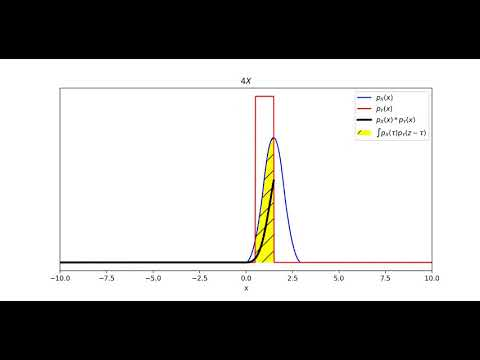

In [13]:

from IPython.display import YouTubeVideo

from IPython.display import YouTubeVideo

def display_yotube_video(url, **kwargs):
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, **kwargs)

display_yotube_video("https://www.youtube.com/watch?v=U84pzAQRJfo", width=800, height=600)


### 3.3 - Use now ALL the dimensions now and select $\mu$'s 
* Check if you have all the dimensions of the training and validation sets (not one like in the previous example)
* Resample to n=100 o similar for working
* Select 20 points of the training sample to use as $\mu$ values
* It will be handy for later doing this in a function, recieving the number of total samples $(n,m)$

In [14]:
iris_sample = dfIris.sample(n=100,random_state=3)
X = iris_sample[['sepal_length','sepal_width','petal_length']].T
y = iris_sample['petal_width']

In [15]:
X

,47,3,31,25,15,118,89,6,103,65,...,13,55,75,132,148,32,80,16,91,74
sepal_length,4.6,4.6,5.4,5.0,5.7,7.7,5.5,4.6,6.3,6.7,...,4.3,5.7,6.6,6.4,6.2,5.2,5.5,5.4,6.1,6.4
sepal_width,3.2,3.1,3.4,3.0,4.4,2.6,2.5,3.4,2.9,3.1,...,3.0,2.8,3.0,2.8,3.4,4.1,2.4,3.9,3.0,2.9
petal_length,1.4,1.5,1.5,1.6,1.5,6.9,4.0,1.4,5.6,4.4,...,1.1,4.5,4.4,5.6,5.4,1.5,3.8,1.3,4.6,4.3


In [16]:
M2  = np.dot(X.T,X)
Xinv=np.linalg.inv( M2 + 10000**np.eye(M2.shape[0]))
w = Xinv.dot(X.T).T.dot(y)

In [17]:
y_est = w.dot(X.to_numpy())

Text(0.5, 0, 'Real')

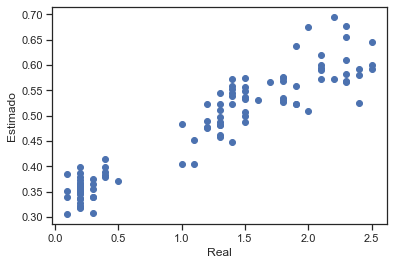

In [18]:
plt.scatter(y,y_est)
plt.ylabel("Estimado")
plt.xlabel("Real")

In [19]:
def get_matrices(n,m):
    iris_sample = dfIris.sample(n=n,random_state=0)
    train_data = iris_sample[:int(len(iris_sample)*0.75)]
    test_data = iris_sample[int(len(iris_sample)*0.25):]
    X=train_data[['sepal_length','sepal_width','petal_length']]
    y=train_data['petal_width']
    mu=X.sample(n=m,random_state=0)
    Xp=test_data[['sepal_length','sepal_width','petal_length']]
    yp=test_data['petal_width']
    return(X,y,mu,Xp,yp)
get_matrices(100,20)

(     sepal_length  sepal_width  petal_length
 114           5.8          2.8           5.1
 62            6.0          2.2           4.0
 33            5.5          4.2           1.4
 107           7.3          2.9           6.3
 7             5.0          3.4           1.5
 ..            ...          ...           ...
 111           6.4          2.7           5.3
 95            5.7          3.0           4.2
 20            5.4          3.4           1.7
 15            5.7          4.4           1.5
 52            6.9          3.1           4.9
 
 [75 rows x 3 columns],
 114    2.4
 62     1.0
 33     0.2
 107    1.8
 7      0.2
       ... 
 111    1.9
 95     1.2
 20     0.2
 15     0.4
 52     1.5
 Name: petal_width, Length: 75, dtype: float64,
      sepal_length  sepal_width  petal_length
 56            6.3          3.3           4.7
 146           6.3          2.5           5.0
 24            4.8          3.4           1.9
 52            6.9          3.1           4.9
 93         

### 3.4 - Construct your own design matrix
* Choose a not so trivial kernel (i.e. Gaussian/Sigmoidal)
* Use the L2-norm $\|\cdot\|_2$ and remember that
$$ (\mathbf{a} - \mathbf{b})^\textrm{T}(\mathbf{a} - \mathbf{b}) = \mathbf{a}^\textrm{T}\mathbf{a} + \mathbf{b}^\textrm{T}\mathbf{b} - 2\mathbf{a}^\textrm{T}\mathbf{b} $$ and remember to round up to 10 decimals
* Plot the matrix using `plt.imshow`

In [20]:
def design_matrix(X,mu,s,func):
    vx   = (X*X).sum(axis=1)
    vmu  = (mu*mu).sum(axis=1)
    Mxmu = X.dot(mu.T)
    A=np.tile(vx,((len(vmu),1))).T
    B=np.tile(vmu,((len(vx),1)))
    C=Mxmu
    
    D=A + B -2*C
    D=np.around(D,decimals=10)
    N=np.sqrt(D)
    N=func(N,s)
    N=np.concatenate([np.ones((len(X),1)),N], axis=1)
    return N

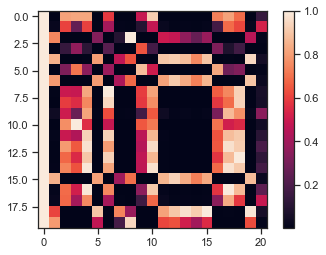

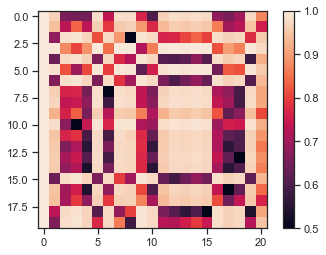

In [21]:
gauss = lambda x,s: np.exp(-(x)**2/(2*s**2))
sigmo = lambda x,s:1./(1. + np.exp(-x/s))

X,y,mu,Xp,yp = get_matrices(150,20)

#ESTO LO PUSE YO PARA ENTENDER EL CODIGO-------------------
''' vx   = (X*X).sum(axis=1);
vmu  = (mu*mu).sum(axis=1);
Mxmu = X.dot(mu.T);
A=np.tile(vx,((len(vmu),1))).T
B=np.tile(vmu,((len(vx),1)))
C=Mxmu    
D=A + B -2*C
D=np.around(D,decimals=10)
N=np.sqrt(D)
N = gauss(N,1.0)
N=np.concatenate([np.ones((len(X),1)),N], axis=1) '''
#FIN DE LO QUE PUSE YO--------------------------------------


plt.imshow(design_matrix(X,mu,1.0,gauss)[:20])
plt.colorbar()
plt.figure()
plt.imshow(design_matrix(X,mu,1.0,sigmo)[:20])
plt.colorbar()

### 3.5 - Train and Predict
* Get a design matrix
* Compute $\mathbf{w} = (\boldsymbol{\Phi}^\textrm{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\textrm{T}\mathbf{y}$ using `scipy.linal` package for computing the inverse. Remember that this model is not regularized, so compute the pseudo-inverse.
* Get the "predictions" for the training data $\mathbf{w}^\textrm{T}\boldsymbol{\Phi}_\mathbf{X}$
* Get the predictions for the test/validation data $\mathbf{w}^\textrm{T}\boldsymbol{\Phi}_\mathbf{X'}$

In [22]:
from scipy import linalg
def train_and_predict(X,y,mu,Xp,yp,s,func):
    # Get the design matrix
    P=design_matrix(X,mu,s,func)
    # Get the weights
    w=linalg.pinv(P.T.dot(P)).dot(P.T).dot(y)
    # Predict 
    pred_y = P.dot(w)
    Pp = design_matrix(Xp,mu,s,func)
    pred_yp = Pp.dot(w)
    return (pred_y,pred_yp)

In [23]:
X,y,mu,Xp,yp     = get_matrices(150,20)
(pred_y,pred_yp) = train_and_predict(X,y,mu,Xp,yp,1.0,gauss)

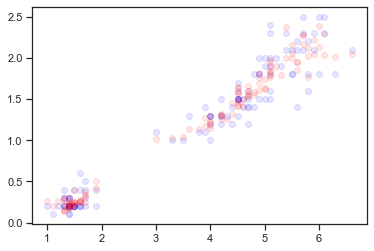

In [24]:
plt.scatter(X['petal_length'],y,c='blue',alpha=0.1)
plt.scatter(X['petal_length'],pred_y,c='red',alpha=0.1)

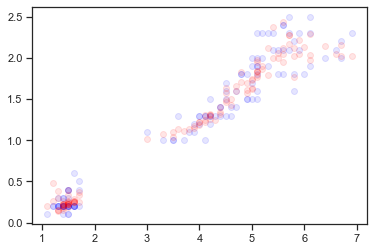

In [25]:
plt.scatter(Xp['petal_length'],yp,c='blue',alpha=0.1)
plt.scatter(Xp['petal_length'],pred_yp,c='red',alpha=0.1)

### 3.6 - Computing the RMS errors
* Compute the RMS error for the training and validation/test set: $RMS = \sqrt{\frac{\sum_i^n (y_i - y_i')^2}{n}}$
* Plot the error for $s \in [0.1,5]$
* Plot the error for $n \in [20,150]$ step = 10
* Plot the error for $m \in [10,100] $ step = 1

In [26]:
def get_errors(n,m,s,func):
    X,y,mu,Xp,yp     = get_matrices(n,m)
    (pred_y,pred_yp) = train_and_predict(X,y,mu,Xp,yp,s,func)
    return (linalg.norm(pred_y - y)/np.sqrt(len(y)),linalg.norm(pred_yp - yp)/np.sqrt(len(yp)))

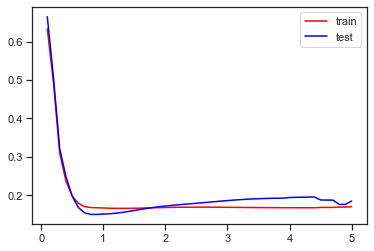

In [27]:
sspace = np.linspace(0.1,5)
train_error=[]
test_error=[]
for s in sspace:
    (tne,tse)=get_errors(150,20,s,gauss)
    train_error.append(tne)
    test_error.append(tse)
plt.plot(sspace,train_error,label='train',c='red')
plt.plot(sspace,test_error,label='test',c='blue')
plt.legend()

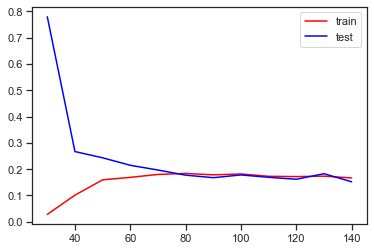

In [28]:
nspace = range(30,150,10)
train_error=[]
test_error=[]
for n in nspace:
    (tne,tse)=get_errors(n,20,1.0,gauss)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(nspace,train_error,label='train',c='red')
plt.plot(nspace,test_error,label='test',c='blue')
plt.legend()
    

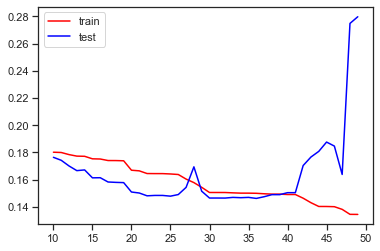

In [29]:
mspace = range(10,50,1)
train_error=[]
test_error=[]
for m in mspace:
    (tne,tse)=get_errors(150,m,1.0,gauss)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(mspace,train_error,label='train',c='red')
plt.plot(mspace,test_error,label='test',c='blue')
plt.legend()